In [2]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import emoji
import string

import nltk
#nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
#path = "/Users/miklp/Documents/GitHub/Student-Projects/datasets_483_982_spam.csv"
path = "/Users/macia/Documents/MSIA-21/IRL-MSIA/datasets_483_982_spam.csv"

#path_1 = "https://raw.githubusercontent.com/mowgl-i/Student-Projects/master/datasets_483_982_spam.csv"
with open(path) as file:
    data = pd.read_csv(file)
    
data.columns = ["class","text", "none","none","none"]

data = data[["class","text"]]

print(data.head())

print("----------")
print("Data Shape:",data.shape)

print("----------")
print("Number of Missing data:",data.isnull().sum())

print("----------")
print(round(747/5572 * 100), "%  of our data is classified as spam",data.groupby("class").count())
#data = pd.read_csv(path_1) 

  class                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
----------
Data Shape: (5572, 2)
----------
Number of Missing data: class    0
text     0
dtype: int64
----------
13 %  of our data is classified as spam        text
class      
ham    4825
spam    747


# Data preprocess


In [4]:
def clean_text(text):
    no_p = "".join([t for t in text if t  not in string.punctuation]) 
    tokenizer = RegexpTokenizer(r'\w+')
    tokens =  tokenizer.tokenize(no_p.lower())
    no_s = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    no_num = [t for t in no_s if t.isalpha()]
    ready_text = [lemmatizer.lemmatize(i) for i in no_num]
    return ready_text
data['ready_text'] = data['text'].apply(lambda x: clean_text(x))

ready_text_2 = data['text'].apply(lambda x: clean_text(x))


### let's use a smaller dataset for now.

In [142]:
ready_text_3 = ready_text_2[0:100]

In [174]:
model = Word2Vec(ready_text_3, min_count = 1, window = 4, workers = 2, size =  2, seed = 1, sg = 1)
print(model)

model.train(sentences = ready_text_3, total_examples = 3, epochs = 10)


Word2Vec(vocab=577, size=2, alpha=0.025)


(8014, 9260)

In [175]:
model.wv.most_similar(['crazy'])

[('something', 0.9999997615814209),
 ('hurt', 0.9999732971191406),
 ('goalsteam', 0.9998131990432739),
 ('check', 0.9997572898864746),
 ('becoz', 0.9996897578239441),
 ('wif', 0.9996645450592041),
 ('vettam', 0.9996044635772705),
 ('mix', 0.9995547533035278),
 ('xxx', 0.9993250966072083),
 ('amore', 0.9992575645446777)]

In [176]:
model.wv.most_similar('call')

[('could', 1.0),
 ('news', 0.9999982714653015),
 ('promise', 0.9999979734420776),
 ('membership', 0.9999938011169434),
 ('feel', 0.9999669790267944),
 ('tsandcs', 0.9999444484710693),
 ('lccltd', 0.9999396204948425),
 ('txt', 0.999925434589386),
 ('going', 0.9999039173126221),
 ('hows', 0.9998999834060669)]

In [163]:
model.wv.most_similar(['xxx'])

[('took', 0.9999880194664001),
 ('use', 0.999987006187439),
 ('crazy', 0.9997115135192871),
 ('fulfil', 0.9996228218078613),
 ('way', 0.9996145963668823),
 ('worried', 0.9996086359024048),
 ('mob', 0.9993154406547546),
 ('granted', 0.9992650747299194),
 ('text', 0.9992020130157471),
 ('already', 0.9989684820175171)]

# Network Graph

In [177]:
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

t_vect = TfidfVectorizer(
    tokenizer = lambda x: x,
    preprocessor = lambda x: x)

%matplotlib inline

t_vect_vectors = t_vect.fit_transform(ready_text_3)


model[model.wv.vocab][:5]

C:\Users\macia\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


array([[ 0.2404515 ,  0.08358591],
       [-0.00750157,  0.09019893],
       [ 0.03005003, -0.20844765],
       [ 0.199916  , -0.14045347],
       [-0.18996464,  0.07538805]], dtype=float32)

In [178]:
token_counts = ready_text_3.apply(pd.Series).stack().value_counts()
token_counts.nlargest(10)

u        18
call     14
im       13
free     10
like      9
sorry     8
go        8
ok        8
dont      8
å         8
dtype: int64

In [179]:
len(t_vect.vocabulary_) == len(token_counts)

True

In [180]:
t_vect.idf_[0:15]

array([4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.51650823, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 3.82336105, 4.92197334])

In [181]:
pd.DataFrame(t_vect.idf_, index=t_vect.get_feature_names(),columns=["idf_weights"])

,idf_weights
abiola,4.921973
abt,4.921973
ac,4.921973
accomodations,4.921973
actin,4.921973
...,...
yummy,4.921973
yup,4.516508
å,3.535679
ì,4.516508


In [182]:

from itertools import combinations

word_pairs = list(combinations(list(model.wv.vocab.keys()),2))

In [170]:
Edge_weight_test = []
for pair in word_pairs:
    edge_weight = model.wv.similarity(pair[0],pair[1])
    Edge_weight_test.append(edge_weight)
print(Edge_weight_test[0:10])
print(word_pairs[0:10])

[0.5808239, -0.7849644, -0.0065232217, -0.39039433, 0.3872374, 0.9645978, 0.44003522, 0.820067, -0.627338, 0.93645716]
[('go', 'jurong'), ('go', 'point'), ('go', 'crazy'), ('go', 'available'), ('go', 'bugis'), ('go', 'n'), ('go', 'great'), ('go', 'world'), ('go', 'la'), ('go', 'e')]


In [183]:
test = []
for word_count in token_counts.items():
   test.append(word_count)
test[0:13]


[('u', 18),
 ('call', 14),
 ('im', 13),
 ('free', 10),
 ('like', 9),
 ('sorry', 8),
 ('go', 8),
 ('ok', 8),
 ('dont', 8),
 ('å', 8),
 ('v', 6),
 ('already', 6),
 ('txt', 6)]

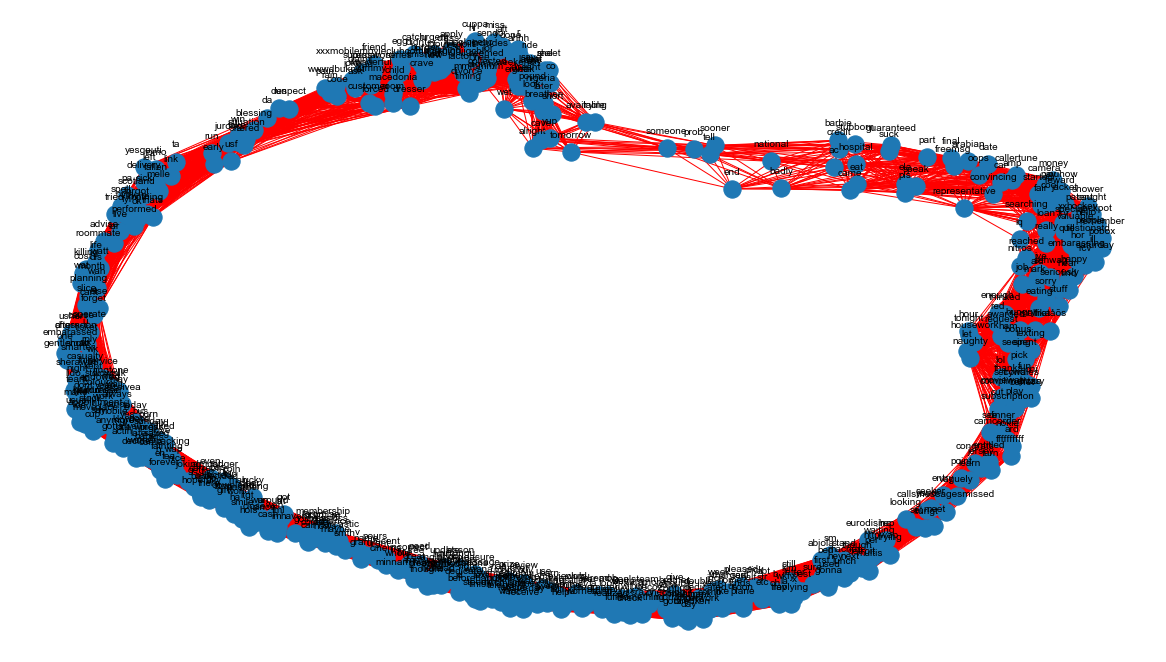

In [184]:
from math import sqrt

testgraph = nx.Graph()
for n in test:
    testgraph.add_node(n[0])

for pair in word_pairs:
    edge_weight = model.wv.similarity(pair[0],pair[1])
    if edge_weight > .95:
        testgraph.add_edge(pair[0],pair[1],weight = edge_weight)

count = testgraph.number_of_nodes()
equilibrium = 10/sqrt(count)
pos = nx.fruchterman_reingold_layout(testgraph, k = equilibrium, iterations  = 100)
plt.rcParams['figure.figsize'] = [16,9]
#nx.draw(testgraph, pos = pos)
nx.draw(testgraph,pos = pos, edge_color = 'red', font_size = 4, with_labels = False)
for p in pos:
    pos[p][1]+=0.05
nx.draw_networkx_labels(testgraph, pos = pos ,font_size = 10, font_color = 'black')
plt.show()



In [21]:
#!pip install --user nxviz
#from nxviz import CircosPlot
nx.draw?

In [64]:
print(testgraph.number_of_nodes())
print(testgraph.number_of_edges())

109
5886


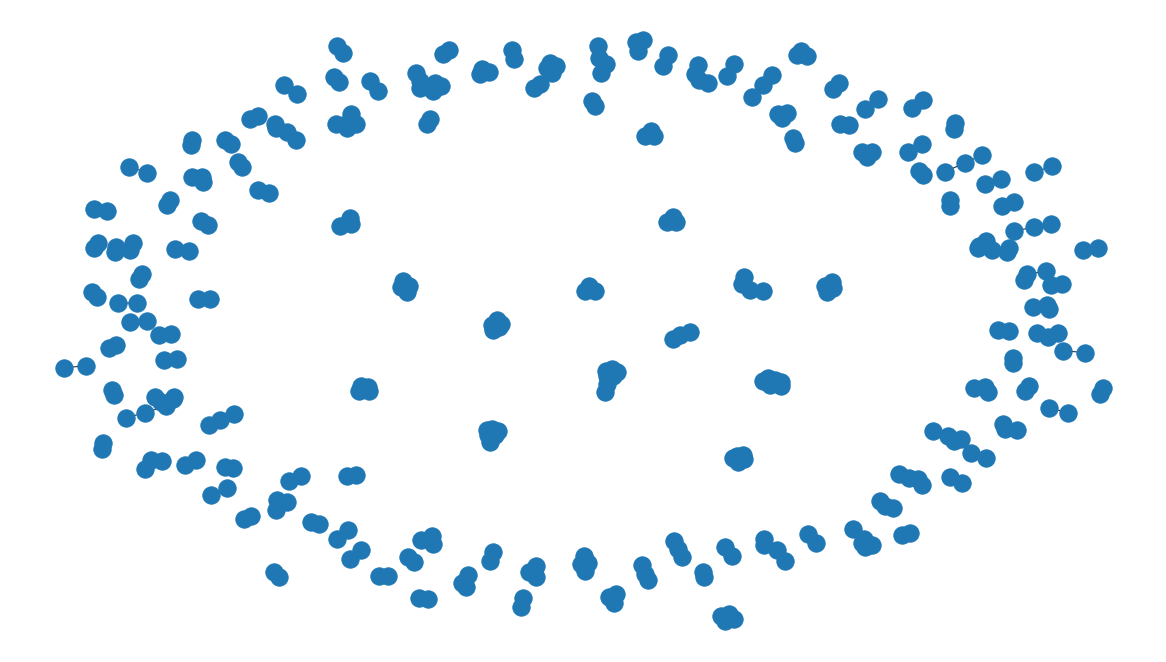

In [190]:
test_graph = nx.Graph()
for word_count in token_counts.items():
    test_graph.add_node(word_count[0] ,count = word_count[1])

for pair in word_pairs:
    edge_weight = model.wv.similarity(pair[0],pair[1])
    if edge_weight > .99999:
        test_graph.add_edge(pair[0],pair[1],weight = edge_weight)

test_graph.remove_nodes_from(list(nx.isolates(test_graph)))        
nx.draw(test_graph)
plt.show()


In [201]:
#test_graph.node(50)

In [191]:
test_graph.number_of_nodes()

350

In [192]:
test_graph.number_of_edges()

294

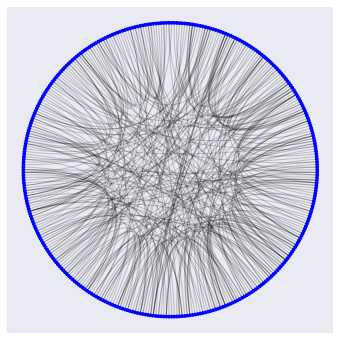

In [196]:
import nxviz
from nxviz import CircosPlot
circle = CircosPlot(test_graph)

circle.draw()
plt.show()